In [1]:
import sklearn
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]
Train on 734 samples
Epoch 1/100


D:\Anacondaa\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


734/734 [==============================] - 1s 1ms/sample - loss: 0.6541 - accuracy: 0.6158
Epoch 2/100
734/734 [==============================] - 0s 45us/sample - loss: 0.6411 - accuracy: 0.6717
Epoch 3/100
734/734 [==============================] - 0s 42us/sample - loss: 0.6282 - accuracy: 0.6989
Epoch 4/100
734/734 [==============================] - 0s 48us/sample - loss: 0.6148 - accuracy: 0.7452
Epoch 5/100
734/734 [==============================] - 0s 41us/sample - loss: 0.6011 - accuracy: 0.7589
Epoch 6/100
734/734 [==============================] - 0s 42us/sample - loss: 0.5869 - accuracy: 0.7725
Epoch 7/100
734/734 [==============================] - 0s 39us/sample - loss: 0.5719 - accuracy: 0.7807
Epoch 8/100
734/734 [==============================] - 0s 38us/sample - loss: 0.5568 - accuracy: 0.7943
Epoch 9/100
734/734 [==============================] - 0s 39us/sample - loss: 0.5419 - accuracy: 0.7956
Epoch 10/100
734/734 [==============================] - 0s 45us/sample - loss

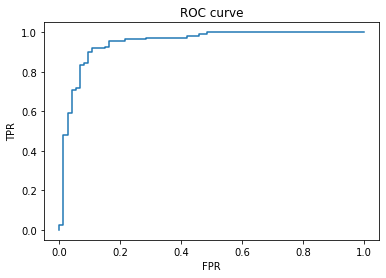

Train on 550 samples, validate on 184 samples
Epoch 1/100
550/550 [==============================] - 0s 248us/sample - loss: 0.3452 - accuracy: 0.8582 - val_loss: 0.3548 - val_accuracy: 0.8533
Epoch 2/100
550/550 [==============================] - 0s 64us/sample - loss: 0.3447 - accuracy: 0.8564 - val_loss: 0.3573 - val_accuracy: 0.8587
Epoch 3/100
550/550 [==============================] - 0s 63us/sample - loss: 0.3436 - accuracy: 0.8600 - val_loss: 0.3569 - val_accuracy: 0.8533
Epoch 4/100
550/550 [==============================] - 0s 73us/sample - loss: 0.3436 - accuracy: 0.8582 - val_loss: 0.3577 - val_accuracy: 0.8533
Epoch 5/100
550/550 [==============================] - 0s 87us/sample - loss: 0.3435 - accuracy: 0.8545 - val_loss: 0.3579 - val_accuracy: 0.8587
Epoch 6/100
550/550 [==============================] - 0s 60us/sample - loss: 0.3418 - accuracy: 0.8582 - val_loss: 0.3604 - val_accuracy: 0.8533
Epoch 7/100
550/550 [==============================] - 0s 60us/sample - loss:

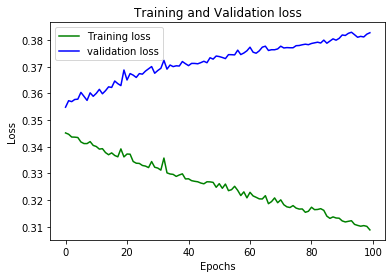

In [23]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
data = pd.read_csv('C:/Users/GAMING/OneDrive/Desktop/sel/sel/heart.csv')
#print(data)
x = data.iloc[:,0:-1].values
y = data.iloc[: , -1].values
#print(x)
#print(y)
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
le = LabelEncoder()
x[:,8] = le.fit_transform(x[:,8])
le = LabelEncoder()
x[:,2] = le.fit_transform(x[:,2])
le = LabelEncoder()
x[:,6] = le.fit_transform(x[:,6])
le = LabelEncoder()
x[:,10] = le.fit_transform(x[:,10])


#train = ['Age','RestingBP','Cholesterol','MaxHR']

print(x)

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=1)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(X_train,Y_train,batch_size=32,epochs=100)
Y_pred = ann.predict(X_test)
Y_pred = (Y_pred>0.5)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print(X_train)

print(100*accuracy_score(Y_test,Y_pred))
predictions = ann.predict_proba(X_test)


#Roc Curve
fpr1, tpr1, _ = roc_curve(Y_test, predictions[:,0])
plt.plot(fpr1, tpr1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


#Loss Curve
history = ann.fit(X_train, Y_train, validation_split=0.25, batch_size = 32, epochs = 100)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
#epochs = range(1,35)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
